首先恭喜各位，通过第一轮的简历筛选，进入线上测试环节。

通过这次线上测试，希望大家能够在限定的时间内，尽自己最大努力，完成一些数据处理和机器学习建模任务，展现自己对机器学习建模工作的熟悉程度。

## 任务说明
请在这个jupyter notebook中
* 补充完成任务所需要的python代码。可以直接在code cell中编写代码；或者将代码写在.py文件中后在这个notebook中import使用
* 利用markdown cell回答相关的问题或者解释分析思路

完成后，在自己的github上建立一个repo。将这个notebook，相关的.py文件，保存处理结果的csv文件等，push到建立的repo。将repo链接提交给面试官。


## 注意事项：
1. 使用python3.6以上版本，如果使用```pandas```等python库，请先升级到最新版本。
2. 请确保面试官在clone各位发布的repo后，能够跑通这个notebook中的代码。
3. 除了实现任务所需的功能，编写的代码具有高可维护性，也是我们非常希望候选人具备的能力。请使用可读性强的命名，避免代码冗余，以及体现其他良好的编程实践。（可参考Refactoring by Kent Beck and Martin Fowler一书中关于"bad code smell"的讨论）
4. 这个测试的目的是检验候选人是否具备高效的完成建模相关工作的能力，对相关工具的熟悉程度也是考核的目标之一。不鼓励重复造轮子。建议充分利用```pandas```, ```sklearn```等已有python库完成任务。
5. 请展现自己真实的能力，不要请人代劳。如果候选人试用期阶段表现的实际工作能力明显低于线上测试表现的能力，候选人会被认为采用非诚信手段通过线上测试，将予以坚决辞退。
6. 职场中，Deadline是非常严肃的。无论完成度如何，请务必在截止时间前，提交自己的结果。逾期提交将不予受理。

## 机器学习建模（任务1～任务2）
以下任务基于虚拟的建模数据dataset.csv

建模数据集构成
* id：样本的编号
* dataset：划分了哪些数据用于train, 那些用于test
* label:  0或者1, 只有train数据才给出了label
* 其实字母f开头的列为建模特征

In [1]:
import pandas as pd
model_data = pd.read_csv('model_data.csv')

### 任务1

请根据train数据，使用3种指定的机器学习算法分别训练模型。这3种算法是
* xgboost
* logistic regression
* random forest

要求:
* 预测目标为label列
* 模型优化的目标为auc_roc
* 需要对特征进行筛选。每种算法训练的模型，最后使用的特征控制在20个以内。
* 每种算法得到的模型，将模型在test数据集的预测结果(0~1之间的一个分值)保存在prediciton.csv文件中。在候选人提交结果后，面试官会计算候选人的模型在test数据集的auc_roc。 csv应该包含id, 以及每个模型对应的proba。请参考作为样例的prediciton_sample.csv中的形式

### 任务2
如果需要在产品中使用。你会推荐使用之前哪个算法得到的模型？解释为什么。

### 任务3

任务1～任务4体现了从得到建模数据，到完成建模实验的环节。

然而，对于整个建模项目来说，以上环节只是一部分工作内容。请候选人根据自己的经验和理解，描述从接到业务部门的需求开始（假设是一个0，1分类的监督式机器学习任务），到监控模型在产品中的使用情况为止，有哪些重要的工作环节？在这些过程中，机器学习建模工程师和业务部门成员如何分工？如何合作？

建议通过流程图配合必要的文字描述，表达自己的理解。





## 数据处理

### 任务4

history_df中存放了每个id，在不同time，对应的A, B的数值。

In [2]:
history_data = pd.read_csv('history_data.csv', parse_dates=['time'])
history_data

,id,time,A,B
0,1,2019-01-26 08:52:00,3.797676,8.432960
1,1,2019-01-29 14:59:00,NaN,4.157219
2,1,2019-01-13 00:01:00,6.516694,4.922487
3,1,2019-02-01 00:27:00,2.627256,NaN
4,1,2019-03-26 00:32:00,8.939391,NaN
5,2,2019-01-01 00:14:00,NaN,6.449302
6,2,2019-01-26 00:52:00,3.629338,1.529292
7,2,2019-02-04 00:05:00,4.299086,NaN
8,2,2019-02-28 00:51:00,NaN,3.140770
9,2,2019-03-01 00:44:00,6.353059,5.926424


sample_df存放了一些id和obs_time的组合。

In [3]:
sample_df = pd.read_csv('sample.csv', parse_dates=['obs_time'])
sample_df

,id,obs_time
0,1,2019-03-07
1,1,2019-02-01
2,2,2019-03-15
3,2,2019-02-01


对sample_df中每个id和obs_time的组合，计算离obs_time过去10, 60天内， 该id对应的A, B的最大值, 非空记录数量。将结果存在不同的列中。

例如:


最终的结果包含的列:
* id
* obs_time
* 10天内A平均值
* 10天内A非空样本数量
* 60天内A平均值
* 60天内A非空样本数量
* 10天内B平均值
* 10天内B非空样本数量
* 60天内B平均值
* 60天内B非空样本数量

将计算结果存为excel保存

In [4]:
# 开发相应的代码
#任务 1
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
model = pd.read_csv('model_data.csv')
task_1_df = pd.DataFrame()

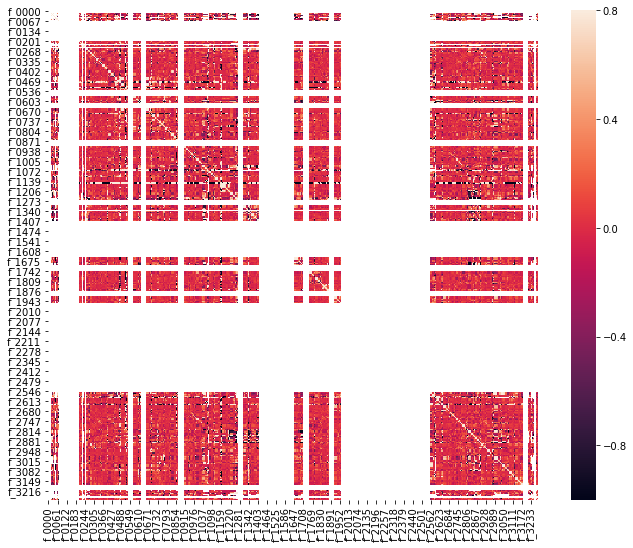

In [5]:
corrmat = model.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

以上代码可以以可视化的方式看到所有特征的关联性

In [6]:
#total = train.isnull().sum().sort_values(ascending = True)
#percent = round(train.isnull().sum().sort_values(ascending = True)/len(train)*100, 2)
#correlation = pd.DataFrame(abs(train.corr()['label']).sort_values(ascending = False))
#df = pd.concat([total, percent, correlation], axis = 1,keys= ['Total', 'Percent', 'correlation'])
#df.to_csv('myfile.csv')

以上代码将3000多个特征的缺失比例（percent）和与label的关联性（correlation）导入"myfile.csv"。在Excel中将缺失比例和关联性用散点图画出来后发现，['f_2738','f_2739','f_2740','f_2745','f_2746','f_3089', 'f_3090','f_3091','f_3092','f_3093','f_3095','f_3096', 'f_3097','f_3098','f_3101','f_3102','f_3103','f_3104', 'f_3105','f_3135']这20个特征有较小的缺失比例和较高的关联性，或者说这些特征距离散点图的x=y线最远并且高于x=y线。详见myfile_graph.xlsx

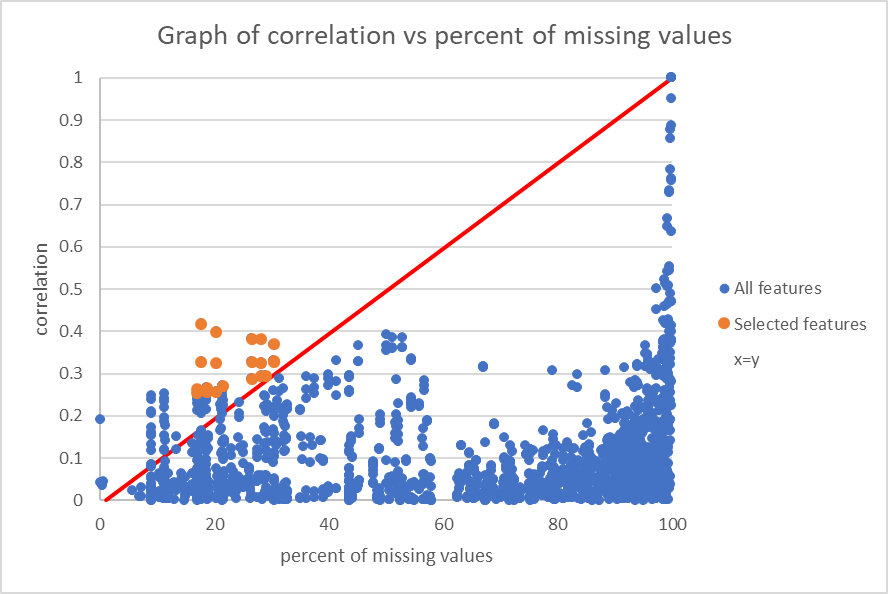

In [7]:
import os
from IPython.display import display, Image
name = "correlation_vs_percent_of_missing_values.png"
display(Image(name, width=1000))

上面是得到的散点图

In [8]:
#x = model.drop(['label'],axis = 1)
x = model[['f_2738','f_2739','f_2740','f_2745','f_2746','f_3089',
           'f_3090','f_3091','f_3092','f_3093','f_3095','f_3096',
           'f_3097','f_3098','f_3101','f_3102','f_3103','f_3104',
           'f_3105','f_3135']][:3000]
y = model[["label"]][:3000]
x_testset = model[['f_2738','f_2739','f_2740','f_2745','f_2746','f_3089',
           'f_3090','f_3091','f_3092','f_3093','f_3095','f_3096',
           'f_3097','f_3098','f_3101','f_3102','f_3103','f_3104',
           'f_3105','f_3135']][3001:3793]
y_testset = model[["label"]][3001:3793]

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,
                                                    y, test_size=0.25)

In [9]:
#train_x = train_x.replace(0, np.NaN)
#train_x.fillna(train_x.mean(), inplace=True)
#print(train_x.isnull().sum())
#print(train_x)
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
train_x = my_imputer.fit_transform(train_x)
test_x = my_imputer.transform(test_x)
x_testset = my_imputer.transform(x_testset)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
train_x = sc.fit_transform(train_x)  
test_x = sc.transform(test_x) 
x_testset = sc.transform(x_testset)

Accuracy Score: 0.8692225466569264
ROC_AUC of xgboost: 0.8646


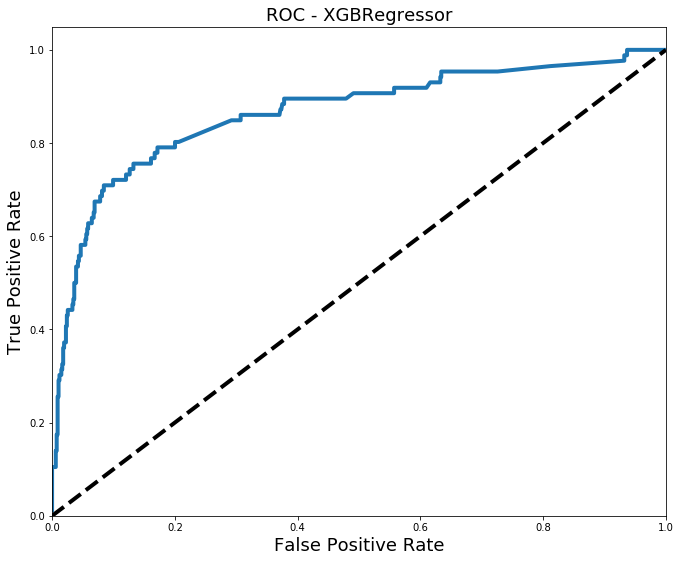

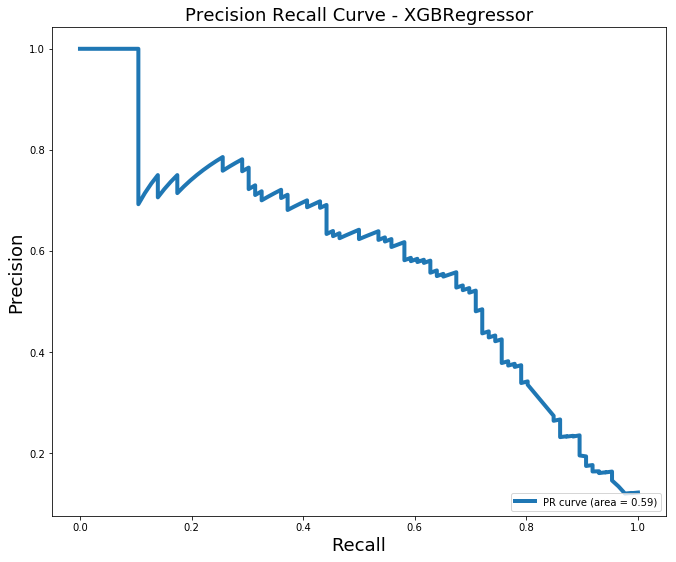

In [10]:
from xgboost.sklearn import XGBRegressor

my_model = XGBRegressor()

my_model.fit(train_x, train_y, verbose=False)

predictions = my_model.predict(test_x)
task_1_df_xgb = my_model.predict(x_testset)

from sklearn.metrics import mean_absolute_error
print("Accuracy Score: " + str(1-mean_absolute_error(predictions, test_y)))

from sklearn.metrics import roc_curve, auc
#y_score = logreg.decision_function(test_x)
FPR, TPR, _ = roc_curve(test_y, predictions)
ROC_AUC = auc(FPR, TPR)
print ("ROC_AUC of xgboost: %.4f"%ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC - XGBRegressor', fontsize= 18)
plt.show()

from sklearn.metrics import precision_recall_curve

#y_score = logreg.decision_function(test_x)

precision, recall, _ = precision_recall_curve(test_y, predictions)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve - XGBRegressor', fontsize=18)
plt.legend(loc="lower right")
plt.show()

Accuracy Score: 0.9
ROC_AUC of Logistic Regression: 0.8032


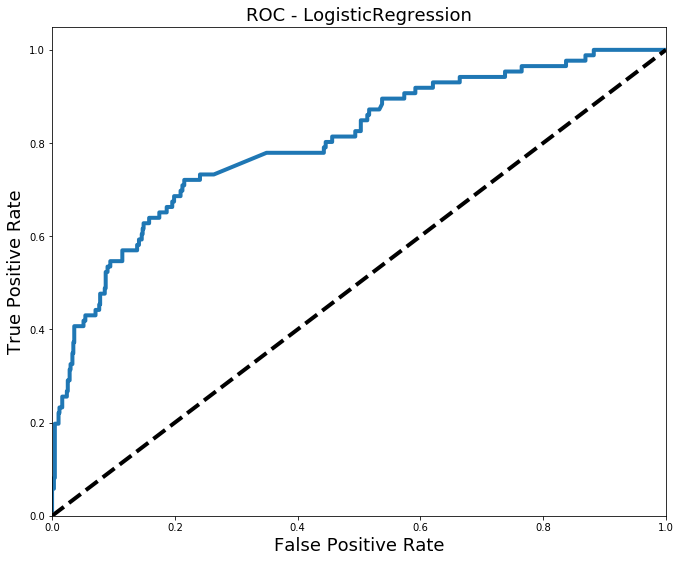

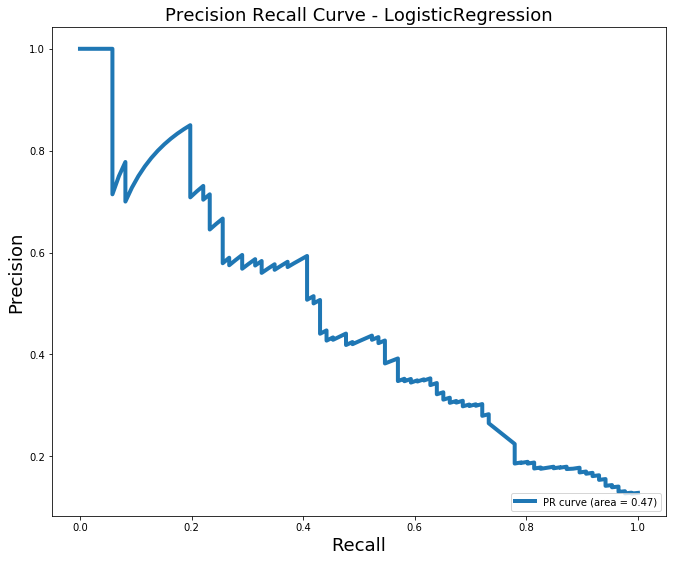

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

logreg = LogisticRegression(solver='liblinear')

logreg.fit(train_x,train_y.values.ravel())

y_pred = logreg.predict(test_x)
task_1_df_lr = logreg.predict(x_testset)

print ("Accuracy Score: {}".format(round(accuracy_score(y_pred, test_y),4)))

from sklearn.metrics import roc_curve, auc
y_score = logreg.decision_function(test_x)
FPR, TPR, _ = roc_curve(test_y, y_score)
ROC_AUC = auc(FPR, TPR)
print ("ROC_AUC of Logistic Regression: %.4f"%ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC - LogisticRegression', fontsize= 18)
plt.show()

from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(test_x)

precision, recall, _ = precision_recall_curve(test_y, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve - LogisticRegression', fontsize=18)
plt.legend(loc="lower right")
plt.show()

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Training score: 0.806470
Testing score: 0.274741
ROC_AUC of Random Forest: 0.8379


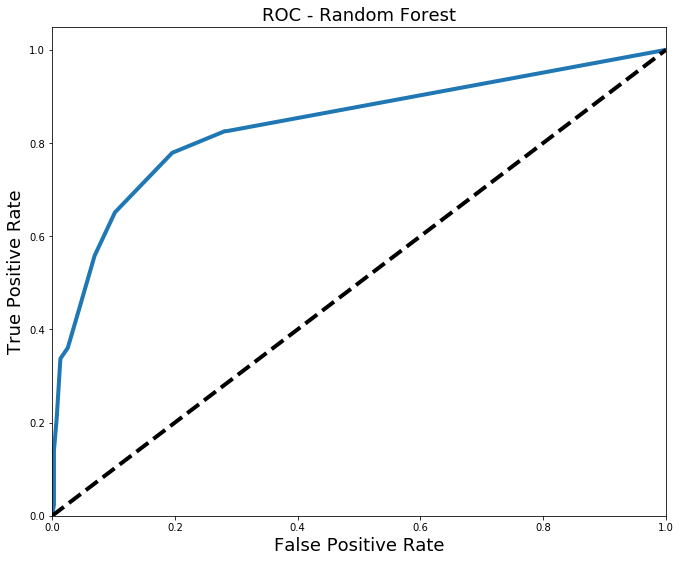

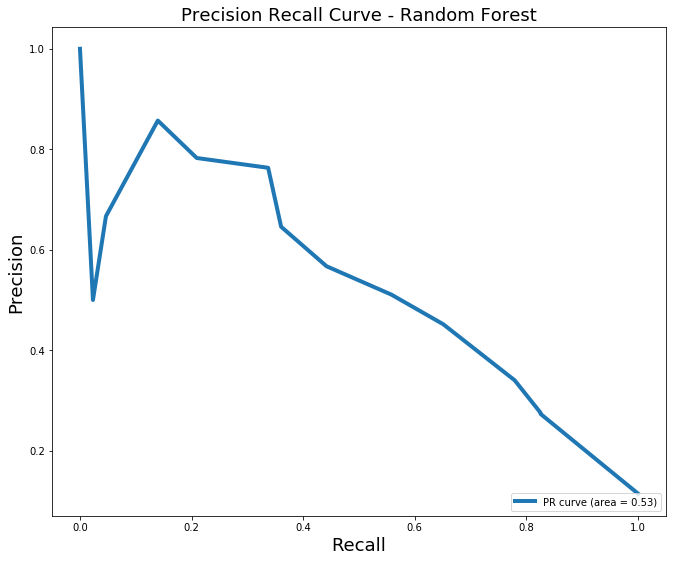

In [12]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
rfr = RandomForestRegressor()
rfr.fit(train_x,train_y)
print("Training score: %f"%rfr.score(np.asmatrix(train_x),train_y.values.ravel()))
print("Testing score: %f"%rfr.score(np.asmatrix(test_x),test_y.values.ravel()))
#predictions = rfr.oob_prediction_
from sklearn.metrics import roc_curve, auc
#y_score = logreg.decision_function(test_x)
predictions = rfr.predict(test_x)
task_1_df_rf = rfr.predict(x_testset)

FPR, TPR, _ = roc_curve(test_y, predictions)
ROC_AUC = auc(FPR, TPR)
print ("ROC_AUC of Random Forest: %.4f"%ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC - Random Forest', fontsize= 18)
plt.show()

from sklearn.metrics import precision_recall_curve

#y_score = logreg.decision_function(test_x)

precision, recall, _ = precision_recall_curve(test_y, predictions)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve - Random Forest', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [13]:
index = []
for i in range(0,792):
    task_1_df_lr[i] = task_1_df_lr[i]
    task_1_df_xgb[i] = task_1_df_xgb[i]
    task_1_df_rf[i] = task_1_df_rf[i]
    #task_1_results[i] = tostr(task_1_df_lr[i])+tostr(task_1_df_xgb)+tostr(task_1_df_rf) 

#task_1_df_lr = pd.DataFrame(task_1_df_lr)
#task_1_df_xgb = pd.DataFrame(task_1_df_xgb)
#task_1_df_rf = pd.DataFrame(task_1_df_rf)
#task_1_df = pd.concat([task_1_df_lr,task_1_df_xgb,task_1_df_rf], ignore_index=True)

index = pd.Series(range(3000,3792),name='id')
task_1_df_lr = pd.Series(task_1_df_lr,name='LR')
task_1_df_xgb = pd.Series(task_1_df_xgb,name='xgb')
task_1_df_rf = pd.Series(task_1_df_rf,name='RF')
task_1_df = pd.concat([index,task_1_df_lr,task_1_df_xgb,task_1_df_rf], axis=1)
print(task_1_df)
task_1_df.to_csv('task_1_results.csv')

       id   LR       xgb        RF
0    3000  0.0  0.075140  0.088634
1    3001  0.0  0.075140  0.088634
2    3002  0.0  0.011528  0.000000
3    3003  0.0  0.011528  0.000000
4    3004  0.0  0.098706  0.000000
5    3005  0.0  0.106580  0.200000
6    3006  0.0  0.075140  0.088634
7    3007  0.0  0.012211  0.000000
8    3008  0.0  0.012211  0.000000
9    3009  0.0  0.036064  0.300000
10   3010  0.0  0.036064  0.300000
11   3011  0.0  0.036064  0.300000
12   3012  0.0  0.089441  0.000000
13   3013  0.0  0.089441  0.000000
14   3014  0.0  0.089441  0.000000
15   3015  0.0  0.012211  0.000000
16   3016  0.0  0.012211  0.000000
17   3017  0.0  0.012211  0.000000
18   3018  0.0  0.075140  0.088634
19   3019  0.0  0.075140  0.088634
20   3020  0.0  0.075140  0.088634
21   3021  0.0  0.017760  0.000000
22   3022  0.0  0.017760  0.000000
23   3023  0.0  0.075140  0.088634
24   3024  0.0  0.023115  0.000000
25   3025  0.0  0.023115  0.000000
26   3026  0.0  0.011528  0.000000
27   3027  0.0  0.01

任务 2
对比xgboost，LR，RF三个模型的P-R曲线，平衡点较远的是xgboost和RF。结合三个模型的ROC_AUC值，由于xgboost的ROC_AUC值(0.8910)最大，说明xgboost的性能最好。

任务3
1.业务理解
首先，根据业务部门的需求清楚地了解业务目标，并找出业务需求。接下来，通过查找应考虑的资源，假设，约束和其他重要因素来评估当前情况。然后，从业务目标和当前情况，创建数据挖掘目标，以实现当前情况下的业务目标。最后，必须建立一个良好的数据挖掘计划，以实现业务和数据挖掘目标。 该计划应尽可能详细。
2.数据理解
数据理解阶段从初始数据收集开始，该数据收集是从可用数据源收集的，以帮助熟悉数据。 必须执行一些重要的活动，包括数据加载和数据集成，以便成功地进行数据收集。接下来，需要仔细检查并报告所获取数据的“粗略”或“表面”属性。然后，需要通过处理数据挖掘问题来探索数据，这些问题可以使用查询，报告和可视化来解决。最后，必须通过回答一些重要问题来检查数据质量，例如“获取的数据是否完整？”，“获取的数据中是否有任何缺失值？”
3.数据准备
数据准备通常占用项目时间的大约90％。 数据准备阶段的结果是最终数据集。 一旦识别出可用的数据源，就需要选择，清理，构造它们并将其格式化为所需的形式。 在此阶段可以进行更深入的数据探索任务，以基于业务理解注意模式。
4.建立模型
首先，必须选择建模技术以用于准备好的数据集。接下来，必须生成测试场景以验证模型的质量和有效性。然后，在准备好的数据集上创建一个或多个模型。最后，需要对涉及利益相关方的模型进行仔细评估，以确保所创建的模型符合业务计划。
5.模型评估
在评估阶段，必须在第一阶段的业务目标背景下评估模型结果。 在此阶段，由于在模型结果中发现的新模式或其他因素，可能会提出新的业务需求。 获得业务理解是数据挖掘中的一个迭代过程。 必须在此步骤中决定是否继续进入部署阶段。
6.部署计划
通过数据挖掘过程获得的知识或信息需要以利益相关者可以在需要时使用它的方式呈现。 根据业务需求，部署阶段可以像创建报告一样简单，也可以像整个组织中的可重复数据挖掘过程一样复杂。 在部署阶段，必须为实施和未来支持创建部署，维护和监视计划。 从项目的角度来看，项目的最终报告需要总结项目经验并审查项目，验证模型效果和业务目标达成情况。

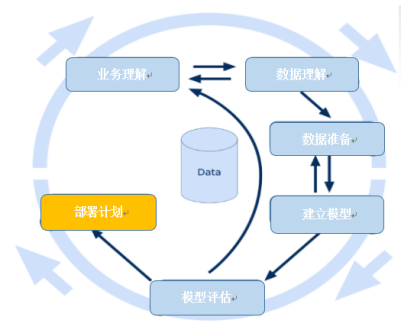

In [14]:
name = "task_3.png"
display(Image(name, width=1000))

In [15]:
#任务 4
days_10 = pd.Timedelta('10 days 00:00:00')
days_60 = pd.Timedelta('60 days 00:00:00')
task_4_df = pd.DataFrame()
items = pd.Series(["10天内A平均值","10天内A非空样本数量","60天内A平均值","60天内A非空样本数量",
        "10天内B平均值","10天内B非空样本数量","60天内B平均值","60天内B非空样本数量"])

days_10_A = pd.DataFrame()
days_10_A_not_null_count = pd.DataFrame()
days_60_A = pd.DataFrame()
days_60_A_not_null_count = pd.DataFrame()
days_10_B = pd.DataFrame()
days_10_B_not_null_count = pd.DataFrame()
days_60_B = pd.DataFrame()
days_60_B_not_null_count = pd.DataFrame()

for i in range(4):
    A_or_B = "A"
    days = days_10
    id_match = history_data["id"] == sample_df["id"][i]
    
    sample = sample_df["obs_time"][i]
    day_bool = history_data["time"] > sample + days    
    
    bool_ = id_match & day_bool
    
    days_10_A[i] = history_data[bool_][[A_or_B]].mean()
    days_10_A_not_null_count[i] = history_data[history_data[A_or_B].notnull()
                                               & bool_][[A_or_B]].count()
for i in range(4):
    A_or_B = "A"
    days = days_60
    id_match = history_data["id"] == sample_df["id"][i]
    
    sample = sample_df["obs_time"][i]
    day_bool = history_data["time"] > sample + days    
    
    bool_ = id_match & day_bool
    
    days_60_A[i] = history_data[bool_][[A_or_B]].mean()
    days_60_A_not_null_count[i] = history_data[history_data[A_or_B].notnull()
                                               & bool_][[A_or_B]].count()

for i in range(4):
    A_or_B = "B"
    days = days_10
    id_match = history_data["id"] == sample_df["id"][i]
    
    sample = sample_df["obs_time"][i]
    day_bool = history_data["time"] > sample + days    
    
    bool_ = id_match & day_bool
    
    days_10_B[i] = history_data[bool_][[A_or_B]].mean()
    days_10_B_not_null_count[i] = history_data[history_data[A_or_B].notnull()
                                               & bool_][[A_or_B]].count()

for i in range(4):
    A_or_B = "B"
    days = days_60
    id_match = history_data["id"] == sample_df["id"][i]
    
    sample = sample_df["obs_time"][i]
    day_bool = history_data["time"] > sample + days    
    
    bool_ = id_match & day_bool
    
    days_60_B[i] = history_data[bool_][[A_or_B]].mean()
    days_60_B_not_null_count[i] = history_data[history_data[A_or_B].notnull()
                                               & bool_][[A_or_B]].count()
    
task_4_df = pd.concat([days_10_A,days_10_A_not_null_count,days_60_A,days_60_A_not_null_count,
                       days_10_B,days_10_B_not_null_count,days_60_B,days_60_B_not_null_count], ignore_index=True)   
    
print(task_4_df)
task_4_df.to_csv('task_4_results.csv')

          0         1    2         3
0  8.939391  8.939391  NaN  6.353059
1  1.000000  1.000000  0.0  1.000000
2       NaN       NaN  NaN       NaN
3  0.000000  0.000000  0.0  0.000000
4       NaN       NaN  NaN  4.533597
5  0.000000  0.000000  0.0  2.000000
6       NaN       NaN  NaN       NaN
7  0.000000  0.000000  0.0  0.000000
